# Convolutional Neural Networks - CIFAR-10 Image Classification

## Preparations

In [54]:
import os

## adapt this directory to your needs
base_dir = '../'
data_dir_base = "C:/Users/Julian/OneDrive - FH OOe/Kurse/3. Semester/NDLeIL/Datasets"
notebook_dir = os.path.join(base_dir, 'Exercise')
data_dir = os.path.join(data_dir_base, 'age-prediction/20-50')

In [55]:
import os, shutil
import random
import sys

import numpy as np
import pandas as pd
import tensorflow as tf

from pyMLaux import show_img_data, plot_history, evaluate_classification_result

In [56]:
train_data_dir = os.path.join(data_dir, 'train')
test_data_dir = os.path.join(data_dir, 'test')
validation_data_dir = test_data_dir

## Configure Data Sources

In [57]:
batch_size = 64
img_size = (32, 32)

In [61]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    shuffle=True,
    image_size=img_size,
    batch_size=batch_size)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    shuffle=False,
    validation_split=0.5,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

validation_data = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    shuffle=False,
    validation_split=0.5,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 33432 files belonging to 31 classes.
Found 7008 files belonging to 31 classes.
Using 3504 files for training.
Found 7008 files belonging to 31 classes.
Using 3504 files for validation.


In [62]:
train_data.class_names

['20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50']

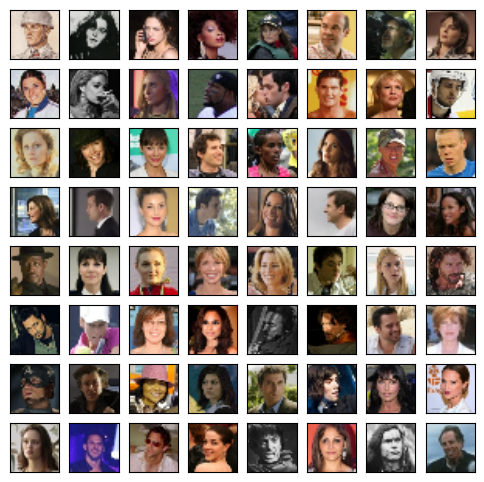

In [63]:
for image_batch, label_batch in train_data:
    show_img_data(image_batch / 255., no=batch_size, layout=(8, 8), figsize=(6, 6))
    break

## Create Model

In [64]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.02, fill_mode='constant', fill_value=-1.),
    tf.keras.layers.RandomZoom(0.1, fill_mode='constant', fill_value=-1.)
], name='data_augmentation')

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.Rescaling(scale=1./127.5, offset=-1.),
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3),
                           padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3),
                           padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3),
                           padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(96, (3, 3),
                           padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(96, (3, 3),
                           padding='same', activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=None, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 96)       │        55,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 96)       │        82,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 8, 8, 96)       │             

 Total params: 217,601 (850.00 KB)

 Trainable params: 216,769 (846.75 KB)

 Non-trainable params: 832 (3.25 KB)

## Train Model

In [ ]:
filepath = base_dir + 'Work/models/CIFAR10/CIFAR10_{epoch:02d}-{val_accuracy:.4f}.keras'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_mae', verbose=1,
                                                save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(train_data, epochs=25, validation_data=validation_data,
                    callbacks=callbacks_list)

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3964 - loss: 1.6947
Epoch 1: val_accuracy improved from -inf to 0.56340, saving model to /content/drive/MyDrive/Work/models/CIFAR10/CIFAR10_01-0.5634.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.3965 - loss: 1.6942 - val_accuracy: 0.5634 - val_loss: 1.2409
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5916 - loss: 1.1581
Epoch 2: val_accuracy improved from 0.56340 to 0.64800, saving model to /content/drive/MyDrive/Work/models/CIFAR10/CIFAR10_02-0.6480.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.5916 - loss: 1.1580 - val_accuracy: 0.6480 - val_loss: 1.0178
Epoch 3/25
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6541 - loss: 0.9853
Epoch 3: val_accuracy improved from 0.64800 to 0.66010, saving model to /content/drive/MyDrive/Work/models/CIFAR10/CIFAR10_03-0.6601.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6542 - loss: 0.9851 - val_accu

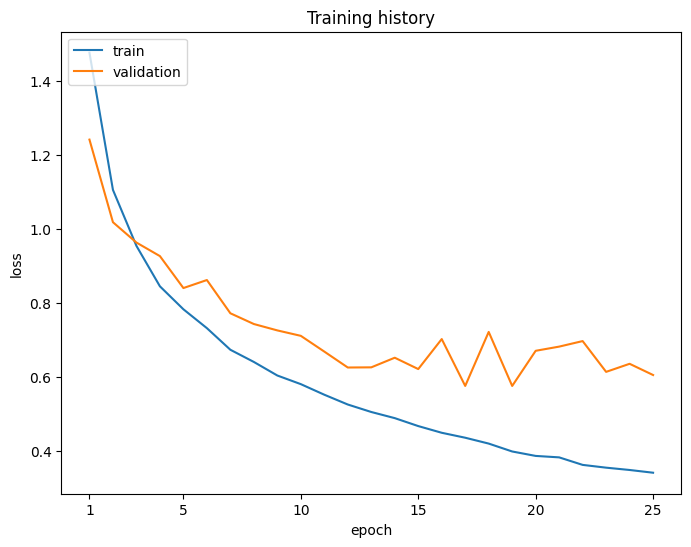

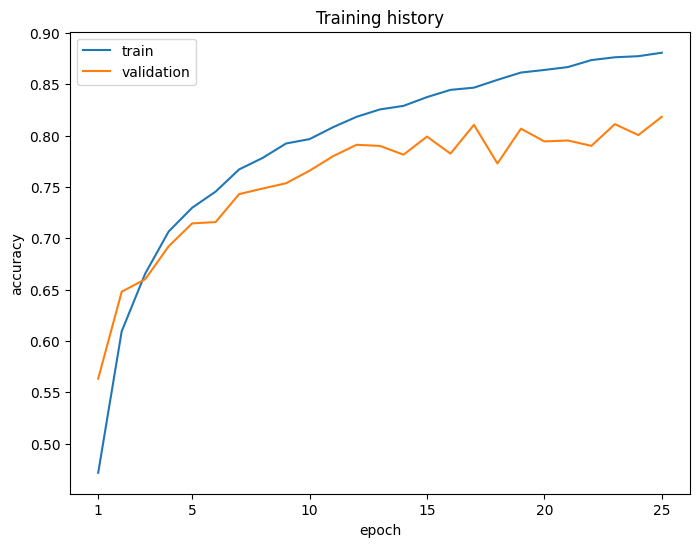

In [14]:
plot_history(history)

## Evaluate on Test Data

In [15]:
pred = model.predict(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [16]:
test_y = np.concatenate([labels for _, labels in test_data], axis=0)

In [17]:
evaluate_classification_result(test_y, pred, classes=test_data.class_names)

Confusion matrix (rows -> true, columns -> predicted):

            airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         918          20    16    8     9    0     3      3     5   
automobile         7         940     3    0     3    0     1      1     3   
bird              60           6   731   22    62   17    27     19     9   
cat               47          18    39  583    79   94    47     35    17   
deer              20           5    30    9   914   11     9     21     0   
dog               13           5    42   81    65  717    19     39     1   
frog              15          16    35   17    31    8   857      3    13   
horse             18           4    17   13    39   13     4    877     4   
ship             121          54     7    1     6    0     2      3   767   
truck             28          55     3    0     1    1     1      3     4   

            truck  
airplane       23  
automobile     43  
bird           10  
cat            3

## Evaluate on Test Data (best model)

In [18]:
model_file = '/content/drive/MyDrive/Work/models/CIFAR10/CIFAR10_25-0.8183.keras'
model = tf.keras.models.load_model(model_file)

In [19]:
pred = model.predict(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


In [20]:
evaluate_classification_result(test_y, pred, classes=test_data.class_names)

Confusion matrix (rows -> true, columns -> predicted):

            airplane  automobile  bird  cat  deer  dog  frog  horse  ship  \
airplane         918          20    16    8     9    0     3      3     5   
automobile         7         940     3    0     3    0     1      1     3   
bird              60           6   731   22    62   17    27     19     9   
cat               47          18    39  583    79   94    47     35    17   
deer              20           5    30    9   914   11     9     21     0   
dog               13           5    42   81    65  717    19     39     1   
frog              15          16    35   17    31    8   857      3    13   
horse             18           4    17   13    39   13     4    877     4   
ship             121          54     7    1     6    0     2      3   767   
truck             28          55     3    0     1    1     1      3     4   

            truck  
airplane       23  
automobile     43  
bird           10  
cat            3

In [21]:
!cd $notebook_dir; jupyter nbconvert --to html CNN_CIFAR10.ipynb

[NbConvertApp] Converting notebook CNN_CIFAR10.ipynb to html
[NbConvertApp] Writing 1160557 bytes to CNN_CIFAR10.html
